## 이번주 목표(얼룩말 책 7장)                
---       

### 이미지 검출(다각형 검출)          
    - 가장자리 검출
    - 윤곽선 검출       
    - 다각형 근사         
    - 코너 검출       
    - 직선 검출        
    - 원 검출

## 이미지 검출          
---      

### 0. 시작하기 전에                

- 이미지 검출은 __영상 내에서 주요한 특징점(Feature Point)을 검출하는 방법으로__, 특징점이 존재하는 위치를 알려주거나 해당 특징점을 부각한다.         
- From : 픽셀의 색상 강도, 연속성, 변화량, 의존성, 유사성, 임계점 등으로 특징을 파악해서         
- To : 가장자리(Edge), 윤곽선, 코너, 블록 껍질, 모멘트, 직선, 원 등을 구분한다.         

#### 1. 가장자리 검출        
- 이미지 내의 가장자리 검출을 위한 알고리즘      
- __픽셀의 그래디언트의 상위 임계값과 하위 임계값을 사용해 가장자리를 검출한다.__      
- 픽셀의 연속성, 연결성 등이 유효해야 하며, 가장자리의 일부로 간주되지 못한 픽셀은 제거되어 가장자리만 남게 된다.     

#### 2. 윤곽선 검출        
- 이미지 내의 윤곽 검출을 위한 알고리즘     
- __동일한 색상이나 비슷한 강도를 가진 연속한 픽셀을 묶어 처리한다.__      
- 윤곽 검출을 통해 모멘트, 면적, 경계선, 코너, 블록 껍질, 피팅 등을 적용할 수 있다.         

#### 3. 직선 검출        
- 이미지의 모든 점에 대한 교차점을 추적한다.         

#### 4. 원 검출             
- 이미지에서 방사형 대칭성이 높은 객체를 효과적으로 검출한다.(한 점을 중심으로 방사형으로/대칭적으로 퍼져있는 객체를 검출한다는 뜻인 것 같습니다.)        

## 1. 가장자리 검출         
--- 

- 가장자리 : 가장 바깥 부분의 둘레, 객체의 테두리      
- 가장자리 : 전경/배경이 구분되는 지점, __전경과 배경 사이에서 밝기가 큰 폭으로 변하는 지점이 객체의 가장자리가 된다.__    
- 그러므로, 가장자리는 픽셀의 밝기가 급격하게 변하는 부분으로 간주할 수 있다.      

- 어떻게 검출하는가?
     1. 픽셀의 밝기 변화율이 높은 부분이 가장자리이므로,     
     2. __미분과 기울기 연산을 수행__ 하여 픽셀의 밝기 변화율이 높은 곳을 찾는다.  

- 1차 미분에서는 극대값/극소값이 가장자리가 되고           
- 2차 미분에서는 제로 크로싱(기울기가 양수->음수로 변화될 때 0의 값을 갖는 위치)가 가장자리가 된다.     
- 픽셀의 밝기에 따른 미분을 진행하므로, 노이즈가 심할 경우 극값/제로크로싱을 제대로 알 수 없으므로 노이즈를 제거하거나 최소화 한 후 검출을 진행한다.

> Q1. 미분 형태의 가장자리 유형은 어떤 것들이 있나요? 가장자리를 검출하는 방식에는 어떤 것들이 있는지 말해주세요.

> A1

<미분 형태의 가장자리 유형>  
1. Step Edge: 픽셀의 밝기 값이 급변하는 부분  
2. Line Edge: 픽셀의 값이 급변한 뒤 다시 원래의 값으로 되돌아온다.  
3. Tamp Edge: 노이즈가 제거된 뒤의 Step Edge  
4. Roof Edge: 노이즈가 제거된 뒤의 Line Edge  

<가장자리 검출 방식>  
1. 소벨 미분
2. 샤르 필터  
3. 라플라시안  
3. 캐니 엣지

### 소벨 미분

- 미분 값을 구할 때 가장 많이 사용되는 연산자이다.      
- 커널을 사용해 미분하며, 커널의 크기는 홀수 값을 갖는다.     
- 커널 내부의 원소 합은 0이 되어야 한다.(중심을 바탕으로 대칭형을 많이 사용한다.) 

[소벨 미분의 개념 이해가 어렵다구요? 이 강좌를 보세요!](https://youtu.be/-4E2-0sxVUM?t=172)

### 샤르 필터

- 소벨 미분의 단점을 보완한 방식     
- 소벨 연산자의 경우 커널의 크기가 작으면 정확도가 떨어지는데, 이를 해결하기 위한 방식이다.

> Q2. 소벨 미분과 샤르 필터의 차이점은 무엇인가요?

> A2

샤르 필터는 3x3 크기만 지원해서 **커널의 크기(ksize)**는 사용하지 않는다.

### 라플라시안

- 라플라시안은 2차 미분의 형태이다.        
- 라플라시안은 1차 미분으로 알게 된 "가장자리의 존재 여부" 에서 더 나아가, __이 가장자리가 밝은곳에서 발생했는지 어두운곳에서 발생했는지__ 를 알게 한다.

> Q3. python opencv의 라플라시안 연산 함수를 확인하고, 소벨 연산과의 차이점을 적어보세요.

> A3

**커널의 크기(ksize)**가 소벨 미분 커널을 의미하며 2차 미분의 계산을 위해 샘플링하는 영역의 크기가 다르다는 것

### 캐니 엣지             

- 캐니 엣지란 __라플라스 필터 방식을 개선한 것으로,__ 노이즈에 민감하지 않아 강한 가장자리를 검출하는 데 목적을 둔 알고리즘이다.

> Q4. 캐니 엣지 알고리즘은 어떻게 동작합니까? 순서대로 적어보세요.

> A4

1. 노이즈 제거를 위해 가우시안 필터를 사용해 **흐림 효과 적용**  
2. 기울기 값이 높은 지점을 검출(소벨 마스크 적용)  
3. 최댓값이 아닌 픽셀의 값을 0으로 변경(명백하게 가장자리가 아닌 값을 제거)  
4. 히스테리시스 임곗값(hysteresis threshold) 적용: 윤곽 생성

> Q5. 이미지를 하나 불러와, 예제 7.2(python opencv에서의 캐니 엣지)를 수행하고 결과를 확인해보세요.

Text(0.5, 1.0, 'Canny Edge')

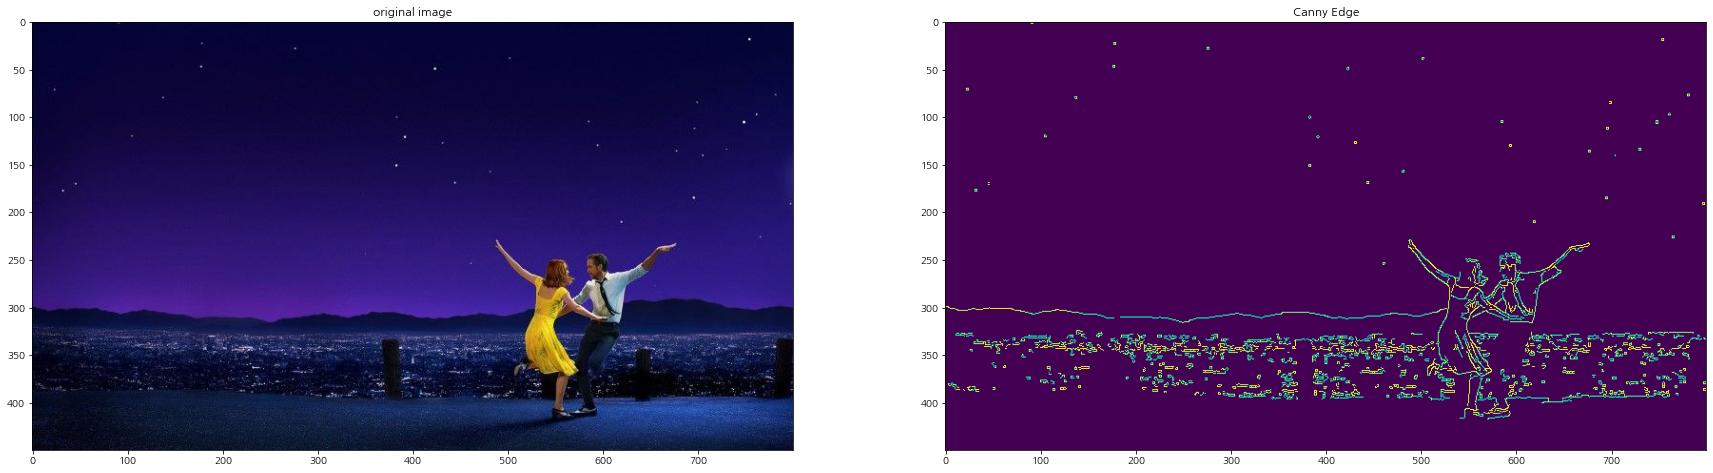

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Orininal image
origin = cv2.cvtColor(cv2.imread('image/6th_day/lalaland.jpg'), cv2.COLOR_BGR2RGB)

# Canny Edge
src = cv2.imread('image/6th_day/lalaland.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.Canny(src, 100, 200, apertureSize=3, L2gradient=True)

plt.figure(figsize=(30,30))

plt.subplot(1,2,1)
plt.imshow(origin)
plt.title('original image')

plt.subplot(1,2,2)
plt.imshow(dst)
plt.title('Canny Edge')

## 2. 윤곽선 검출         
---

- 가장자리 검출은 가장자리 픽셀의 요소는 알 수 있었지만, 검출된 객체들의 구성 요소가 구분되어 있지 않아 형태를 알 수 없었다.       
- 윤곽선 검출은 __가장자리가 검출된 픽셀을 대상으로 세그멘테이션을 진행한다.__     

- 윤곽선을 검출하는 과정      
    1. 검출하기 좋은 상태의 이미지를 만든다.(노이즈 제거)      
    2. 윤곽선 검색 방법과 근사 방법을 선택       
        - 모든 윤곽선을 반환할 것인가?     
        - 검출된 윤곽선 중 강도가 높은 윤곽점만 반환할 것인가?     
        
    3. 계층 구조의 형태            
        - 검색 방법에 따라 계층 구조가 달라지며, 이 계층 구조의 윤곽선들이 어떤 형태로 연결/분리되어 있는지 확인할 수 있다.

### 계층 구조

> Q6. 계층 구조는 기본적으로 어떤 형태를 띱니까? 계층 구조의 내용을 정리하여 설명해주세요.

> A6

윤곽선의 계층구조는 인덱스의 값으로 레벨을 나누며 계층 구조에서 반환되는 값은 **다음 윤곽선, 이전 윤곽선, 자식 윤곽선, 부모 윤곽선**  
다음 윤곽선과 이전 윤곽선은 같은 레벨 선상에 있는 노드를 의미  
자식 노드가 여러 개일 경우 동일 레벨의 노드를 표현하는 다음 윤곽선과 이전 윤곽선으로 파악하거나 트리 구조 특성상 부모 노드는 하나만 갖게 되므로 자식 노드에서 부모 노드를 확인 가능  

계층 구조의 형태로 **윤곽선(contour)**인지 윤곽선 안의 **홀(hole)**인지 파악 가능, **홀(hole)**안의 **윤곽선(contour)**도 파악 가능

### 윤곽선 검출         

- __윤곽선 검출 함수의 주요 매개변수는 1. 검색 방법 과 2. 근사 방법  을 선택하는 것이다.__ 

- 검색 방법은 윤곽선을 검출해 어떤 계층 구조에 적용할 것인지를 설정하며,      
- 근사 방법은 윤곽점의 표시 방법을 설정한다.

> Q7. python opencv의 윤곽선 검출 함수에 대해 적어보고, 각각의 요소가 무슨 역할을 하는지 설명해주세요.

> A7

    contorus, hierarchy = cv2.findContorus(
        image,
        mode,
        method,
        offset=None
        )
        
image: 전처리가 진행된 입력 이미지  
mode: 검색방법, 윤곽선을 검출해 어떤 계층 구조의 형태를 사용할지 설정  
method: 근사방법, 윤곽점의 표시 방법을 설정  
contours: 검출된 윤곽선
hierarchy: 계층 구조  

근사 방법에 따라 **검출된 윤곽선(contours)**에 포함될 좌표의 수나 정교함의 수준이 달라진다.  
**오프셋(offset)**은 반환된 윤곽점들의 좌푯값에 이동할 값을 설정

> Q8. 표 7.1을 참고하여, 검색 방법에는 어떤 것들이 있는지 알려주세요.

> A8

1. cv2.RETR_EXTERNAL: 최외곽 윤곽선만 검색. 내부의 홀이나 내부 윤곽은 검출하지 않는다.  
2. cv2.RETR_LIST: 모든 윤곽선을 검출하며, 계층 구조를 형성하지 않음(모든 윤곽선을 동일 레벨로 간주) 내부의 홀이나 내부 윤곽을 검출  
3. cv2.RETR_CCOMP: 모든 윤곽선으로 검색해서 2단계 계층 구조로 구성(최상위 레벨은 외곽. 두 번째 레벨은 내곽(홀))  
4. cv2.RETR_TREE: 모든 윤곽선을 검출하고 트리 구조로 구성

> Q9. 표 7.2를 참고하여, 근사 방법에는 어떤 것들이 있는지 알려주세요.

> A9

1. cv2.CHAIN_APPROS_NONE: 검출된 모든 윤곽점을 반환(좌푯값)  
2. cv2.CHAIN_APPROS_SIMPLE: 수평, 수직, 대각선 부분을 압축해서 끝점만 반환(중복되는 픽셀을 제거해서 최대한 윤곽선을 그릴 때 필요한 성분만 남김)  
3. cv2.CHAIN_APPROX_TC89_L1, cv2.CHAIN_APPROX_TC89_KCOS: Teh-Chain 체인 근사 알고리즘을 적용

### 윤곽선 그리기        

> Q10. 예제 7.4(python opencv에서의 윤곽선 검출)를 수행해보세요.

0 [-1 -1  1 -1]
1 [ 2 -1 -1  0]
2 [ 3  1 -1  0]
3 [ 4  2 -1  0]
4 [ 5  3 -1  0]
5 [ 6  4 -1  0]
6 [ 7  5 -1  0]
7 [ 8  6 -1  0]
8 [ 9  7 -1  0]
9 [10  8 -1  0]
10 [11  9 -1  0]
11 [12 10 -1  0]
12 [13 11 -1  0]
13 [14 12 -1  0]
14 [15 13 -1  0]
15 [16 14 -1  0]
16 [17 15 -1  0]
17 [18 16 -1  0]
18 [19 17 -1  0]
19 [20 18 -1  0]
20 [21 19 -1  0]
21 [22 20 -1  0]
22 [-1 21 -1  0]


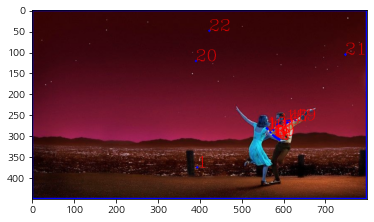

In [13]:
import cv2

src = cv2.imread('image/6th_day/lalaland.jpg')
dst = src.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
morp = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
image = cv2.bitwise_not(morp)

contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(dst, contours, -1, (0,0,255),3)
for i in range(len(contours)):
    cv2.putText(dst, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 1.3, (255,0,0),1)
    print(i, hierarchy[0][i])
    
plt.imshow(dst)

## 3. 다각형 근사           
---

- 다각형 근사는 검출된 윤곽선의 형상을 분석할 때 정점의 수가 적은 다각형으로 표현하도록, 다각형 곡선을 근사하는 방법이다.     
- 윤곽선 검출 함수에서 반환된 윤곽선 정보를 활용해 윤곽점의 개수를 축소한다.

> Q11. 왜 정점의 수가 적은 것이 중요한가요? 아래의 그림을 보고 그 의미를 추측해봅시다.      
- 로우폴리와 하이폴리 

![로우앤하이](./PostingPic/lowandhigh.png)

- 다각형 근사는 더글라스-패커 알고리즘을 사용한다.      
- 반복과 끝 점을 이용해, 선분으로 구성된 윤곽선들을 더 적은 수의 윤곽점으로, 동일하거나 비슷한 윤곽선으로 데시메이트(가위질!) 한다.

> Q12. 예제 7.6(python opencv에서의 다각형 근사)를 수행해보세요.

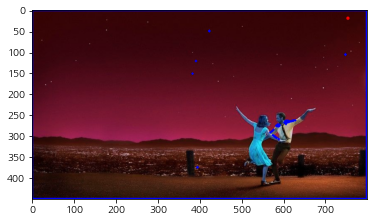

In [16]:
import cv2

src = cv2.imread('image/6th_day/lalaland.jpg')
dst = src.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
morp = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
image = cv2.bitwise_not(morp)

contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for i in contours:
    perimeter = cv2.arcLength(i ,True)
    epsilon = perimeter * 0.05
    approx = cv2.approxPolyDP(i, epsilon, True)
    cv2.drawContours(dst, [approx], 0, (0,0,255), 3)
    
for j in approx:
    cv2.circle(dst, tuple(j[0]), 3, (255,0,0), -1)
    
plt.imshow(dst)

### 윤곽선 정보

1. 윤곽선 길이 계산      
2. 윤곽선 면적 계산     
3. 윤곽선 경계 사각형     
4. 윤곽선의 최소 면적 사각형          
5. 윤곽선의 최소 면적 원      
6. 윤곽선의 타원 피팅      
7. 윤곽선의 볼록 껍질       
8. 윤곽선의 볼록성 시험       
9. 윤곽선의 모멘트

> Q12. 위의 윤곽선 정보 요소들을 차분히 읽고, 홀수/짝수 번호를 선택하여 해당 번호의 정보들에 대해 설명해주세요.

1. 윤곽선의 길이 계산  
- **윤곽선**(curve)의 길이를 계산. **폐곡선**(closed)은 윤곽선의 닫힘 여부이다.  
- 윤곽선이 닫힌 것으로 간주하면 마지막 지점과 첫 번째 지점을 연결한다.  
- 윤곽선의 닫힘 여부에 따라 반환되는 **길이**(length)의 값이 달라진다.  

2. 윤곽선의 면적 계산  
- **윤곽선**(curve) 내부 면적을 계산. **방향성**(oriented)은 계산된 윤곽선 면적의 부호를 의미.  
- 방향성이 참일 경우, 윤곽선의 방향(시계방향, 반시계 방향)에 따라 부호가 있는 면적 값으로 반환. 거짓 값을 사용할 경우 절댓값으로 계산되어 면적이 반환된다.  

3. 윤곽선의 경계 사각형  
- **윤곽선**(curve)의 경계면을 둘러싸는 사각형을 구한다. 반환되는 결과는 회전이 고려되지 않은 직사각형 형태를 띠는데, 경계면의 윤곽점들을 둘러싸는 최소 사각형의 형태를 띤다.  
- Python OpenCV는 (x, y, width, height)의 형태로 반환된다.  

4. 윤곽선의 최소 면적 사각형  
- **윤곽선**(points)의 경계면을 둘러싸는 최소 크기의 사각형을 구한다. 반환되는 결과는 회전을 고려한 직사각형 형태를 띤다.  
- 경계면의 윤곽점들을 둘러싸는 회전된 최소 직사각형의 형태를 띤다.  
- Python OpenCV는 ((centerX, centerY), (width, height), angle)의 형태로 반환.  

5. 윤곽선의 최소 면적 원  
- **윤곽선**(points)의 경계면을 둘러싸는 최소 크기의 원을 구한다.  
- 반환되는 결과는 **중심점의 좌표**(center)와 **반지름**(radius)을 갖는다.  
- Python OpenCV는 (centerX, centerY), radius의 형태로 반환.  

6. 윤곽선의 타원 피팅  
- **윤곽선**(points)의 집합에 대해 가장 근사한 타원을 구한다. 최소 면적 원 함수는 윤곽점이 원 내부에 존재하지만 타원 피팅 함수는 윤곽점이 타원 밖에 존재할 수도 있다.  
- 반환되는 결과: 회전을 고려한 직사각형의 형태를 띠지만 타원 그리기 함수는 회전 직사각형 구조체의 형식도 인수값으로 활용 가능.  
- Python OpenCV에서는 ((centerX, centerY), (axesWidth, axesHeight), angle)의 형태로 반환.  

7. 윤곽선의 볼록 껍질  
- **윤곽선**(points)의 경계면을 둘러싸는 다각형을 구한다.  
- 반환되는 결과: 윤곽선 검출 결과와 동일한 형식을 띤다.  
- **방향**(clockwise): 검출된 볼록 껍질의 볼록점들의 인덱스 순서를 의미. True라면 볼록점들이 시계 방향으로 정렬.  
- 볼록 껍질 알고리즘은 O(NlogN) 시간 복잡도를 갖는 **스크랜스키(Sklansky) 알고리즘**을 이용해 입력된 좌표들의 볼록한 외곽을 찾는다.  

8. 윤곽선의 볼록성 시험  
- **윤곽선**(contour)의 형태가 볼록한 형태를 지니고 있는지 확인.  
- 볼록한 형태는 윤곽선의 형태가 볼록한 형태가 수직한 형태를 갖는 것을 의미.  
- 볼록한 경우 단순한 다각형의 형태를 지니고 있다고 볼 수 있다. 윤곽선이 볼록하다면 참 값을 반환.  

9. 윤곽선의 모멘트  
- **윤곽선**(array)이나 **이미지**(array)의 0차 모멘트부터 3차 모멘트까지 계산.  
- **이진화 이미지**(binary image)는 입력된 array 매개변수가 이미지일 경우 이미지의 픽셀 값들을 이진화 처리할 지 결정.  
- True라면 이미지의 픽셀값이 0이 아닌 값은 모두 1의 값으로 변경해 모멘트를 계산.  

> Q13. 스크랜스키 알고리즘이란 무엇인가요? 위의 윤곽선 관련 함수 중 특히 어디에 쓰이나요?

> A13

- 스크랜스키 알고리즘은 윤곽점에서 경계 사각형의 정점(Vertex)을 검출.  
- 윤곽선의 볼록 껍질 함수와 연관.

## 4. 코너 검출

- 코너 검출은 __이미지 상에서 코너점을 검출하는 알고리즘이다.__      
- 다각형의 꼭지점 검출이라기 보다는, __트래킹하기 좋은 지점을 코너라 한다.__     

- 코너점은 앞서 배운 다각형 근사의 근사치 정확도 값으로 검출할 수도 있지만, 여기에서는 코너 강도를 계산하여 검출해보기로 한다.    
- 코너 검출 알고리즘은 __높은 도함수를 갖는 지점을 계산해서,(가장 두드러지는 코너점) 코너의 정의에 만족하는 지점을 반환한다.__

> Q14.python opencv의 코너 검출 함수를 적어보세요.      
> - 코너 최댓값
> - 코너 품질
> - 마스크
> - 블록 크기             가 갖는 의미는 각각 무엇인가요?

> A14

    corners = cv2.GoodFeaturesToTrack(
        iamge,
        maxCorners,
        qualityLevel,
        minDistance,
        mask = None,
        blockSize = None,
        useHarrisDetector = None,
        k = None
        )
        
1. **image**: 8비트 또는 32비트의 단일 채널 이미지를 사용해 **corner**검출  
2. **maxCorners(코너 최댓값)**: 검출할 최대 코너의 수를 제한. 0 이하의 값을 사용하면 최대 코너의 수를 제한하지 않으며, 검출할 최대 코너의 수보다 더 많은 코너의 수가 검출될 경우 코너 강도가 약한 코너점은 반환하지 않는다.  
3. **qualityLevel(코너 품질)**: 반환할 코너의 최소 품질을 설정. 0.0 ~ 1.0사이의 값.(일반적으로 0.01~0.1 사이의 값 사용)  
코너 품질을 계산할 때 검출된 코너 중 가장 좋은 코너 강도를 갖는 측정값에 코너 품질 수치를 곱한 값보다 낮은 값이며 해당 코너들은 무시.  
예시) 가장 좋은 코너의 강도가 1000이고 코너 품질이 0.01이라면 10 이하의 코너 강도를 갖는 코너들은 검출하지 않는다.  
4. **minDistance(최소 거리)**: 검출된 코너들의 최소 근접 거리. 설정된 최소 거리 이상의 값만 검출.  
5. **mask(마스크)**: 입력 이미지와 같은 차원을 갖는 이미지(배열). 마스크의 값이 0인 곳은 코너를 계산하지 않는다.  
6. **blockSize(블록크기)**: 코너를 계산할 때 고려하는 코너 주변 영역의 크기. 블록 크기 영역에 대해 고유 값과 고유 벡터를 계산.  


##### 해리스 코너 검출기        

- 코너 강도를 계산하는데 사용할 알고리즘       
- true이면 해리스 코너 검출기를, false이면 지안보 시와 카를로 토마시가 개선한 특징 검출 알고리즘을 사용한다.

> Q15. 해리스 코너 검출기 알고리즘은 무엇인가요? 내용을 찾아보고, 요약하여 적어주세요.

코너 점이란 픽셀 값들이 두 방향 이상에서 급변하는 점이다. 해리스 코너 검출기는 이러한 아이디어에서 두 방향 이상에서 급변하는 점을 찾는 알고리즘이다.  

> 출처: https://bskyvision.com/668

> Q16. 예제 7.8(python opencv에서의 코너 검출 및 코너 픽셀 세밀화)를 수행해보세요. (사람 형태의 이미지를 권장합니다.)

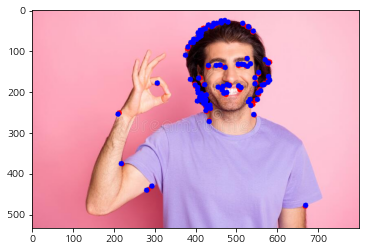

In [21]:
import cv2

src = cv2.cvtColor(cv2.imread('image/6th_day/person.jpg'), cv2.COLOR_BGR2RGB)
dst = src.copy()

gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 5, blockSize=3, useHarrisDetector=True, k=0.03)

for i in corners:
    cv2.circle(dst, tuple(i[0]), 3 , (255,0,0), 5)
    
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 30, 0.001)
cv2.cornerSubPix(gray, corners, (5,5), (-1,-1), criteria)

for i in corners:
    cv2.circle(dst, tuple(i[0]), 3, (0,0,255), 5)
    
plt.imshow(dst)

## 5. 직선검출

- 이미지에서 선형적인 부분을 검출하기 위해 사용한다.        
- 직선 검출 알고리즘은 허프 변환(Hough Transform) 알고리즘을 활용해 직선을 검출한다.         

> Q17. 허프 변환 알고리즘에 대해 찾아보고, 내용을 요약해 보세요.

> A17

허프 선 변환은 이미지 내의 어떤 점이라도 선 집합의 일부일 수 있다는 가정에 직선의 방정식을 이용해 직선을 검출한다.  
직선을 검출하는 방법에는 기울기와 절편을 이용할 수 있지만 좋은 방식이 아님.  
거리와 각도를 이용해 표현할 수 있다.  
모든 점 $P_n$에 대해 삼각 함수를 활용한 직선의 방정식으로 **직선과 원점의 거리($\rho$)**와 **직선과 x축이 이루는 각도($\theta$)**로 표시.  

- opencv의 허프 변환은 총 세 종류의 변환을 지원한다.         
    1. 표준 허프 변환       
    2. 멀티 스케일 허프 변환       
    3. 점진성 확률적 허프 변환

> Q18. 위의 세 종류 허프 변환에 대해 짧게 설명해주세요.

> A18

1. 표준 허브 변환: 위에서 설명한 허프 변환 알고리즘과 동일  
2. 멀티 스케일 허프 변환: 표준 허프 변환 개선(검출한 직선의 값이 더 정확한 값으로 반환되도록)  
3. 점진성 확률적 허프 변환: 위 2가지 알고리즘은 모든 점에 대해 직선의 방정식을 세워 계산하기 때문에 시간이 오래 걸리는 단점. 점진성 확률적 방법을 이용하면 임의의 점 일부만 누적해서 계산. 일부의 점만 사용하기 때문에 확률적이며, 정확도가 높은 입력 이미지에 대해 검출에 드는 시간이 대폭 줄어든다.

> Q19. 예제 7.10(python opencv에서의 허프 변환)을 수행해보세요.

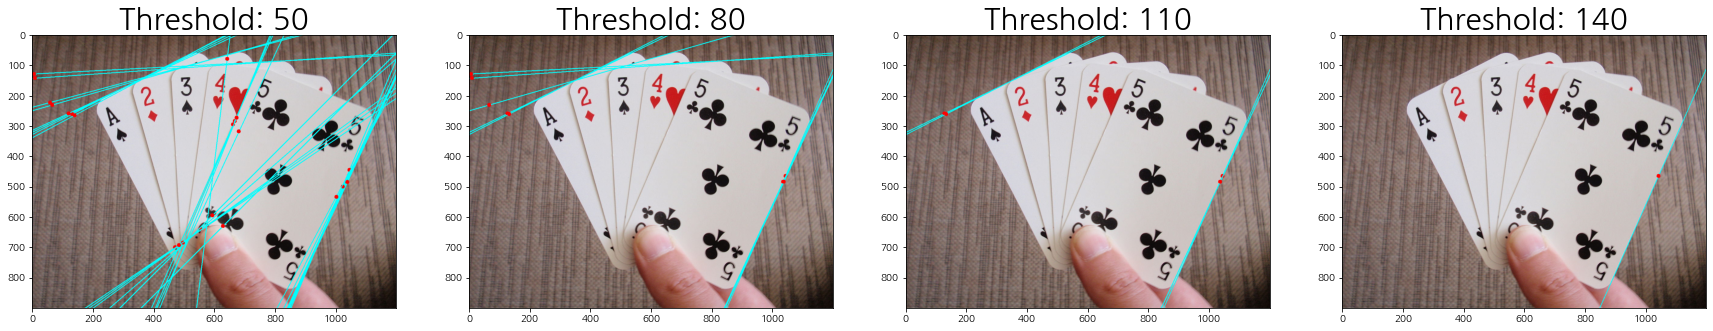

In [38]:
import cv2
import numpy as np

src = cv2.cvtColor(cv2.imread('image/6th_day/card.jpeg'), cv2.COLOR_BGR2RGB)

threshold = [50,80,110,140]
plt.figure(figsize=(30,30))
for j in range(len(threshold)):
    lines = cv2.HoughLines(canny, 1, np.pi/180, threshold[j], srn=50, stn=10, min_theta=0, max_theta=np.pi/2)
    dst = src.copy()
    for i in lines:
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3), (-1,-1))
        gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
        morp = cv2.dilate(binary, kernel)
        morp = cv2.erode(morp, kernel, iterations=3)
        morp = cv2.dilate(morp, kernel, iterations=2)
        canny = cv2.Canny(morp, 0,0,apertureSize=3, L2gradient=True)
        rho, theta = i[0][0], i[0][1]
        a,b = np.cos(theta), np.sin(theta)
        x0, y0 = a*rho, b*rho

        scale = src.shape[0] + src.shape[1]

        x1 = int(x0+scale* -b)
        y1 = int(y0+scale* a)
        x2 = int(x0-scale* -b)
        y2 = int(y0-scale* a)

        cv2.line(dst, (x1,y1), (x2,y2), (0,255,255),2)
        cv2.circle(dst, (x0,y0), 3, (255,0,0), 5, cv2.FILLED)
    plt.subplot(1,len(threshold),j+1)
    plt.imshow(dst)
    plt.title('Threshold: {}'.format(threshold[j]), fontsize=30)

## 6. 원 검출

- 원 검출 역시 허프 변환 알고리즘 중 하나인 허프 원 변환 알고리즘을 활용해 원을 검출한다.         
- 허프 원 변환 알고리즘은 2차원이 아닌 3차원 누산 평면으로 검출한다.        

[3차원 누산 평면에서의 검출 알고리즘을 설명한 블로그](https://doongdoongeee.tistory.com/37)

> Q20. python opencv의 허프 원 변환 함수는 어떻게 표현되는지 알려주세요.

> A20

    circles = cv2.HoughCircles(
        image,
        method,
        dp,
        minDist,
        param1 = None,
        param2= None,
        minRadius = None,
        maxRadius = None
    )
    
1. **입력 이미지(image)**: 8비트 단일 채널이미지. 각 픽셀에 그레이디언트 방향을 측정하기 위해 내부적으로 소벨 연산 수행. '가장자리 검출'에서 배운 소벨 연산은 그레이 스케일 형태의 이미지를 활용. 허프 원 변환 함수는 이진화 이미지를 사용하지 않고 **그레이스케일** 형태의 이미지를 입력값으로 사용.  
2. **검출 방법(method)**: 항상 2단계 허프 변환 방법(21HIT, 그레이디언트)만 사용.  
3. **해상도 비율(dp)**: 원의 중심을 검출하는 데 사용되는 누산 평면의 해상도. 인수를 1로 지정하면 입력한 이미지와 동일한 해상도를 가진다. 즉, 입력 이미지의 너비와 높이가 동일한 *누산 평면*이 생성. 인수가 2라면 누산 평면의 해상도가 절반으로 줄어 입력 이미지의 크기와 반비례.  
4. **최소거리(minDist)**: 일차적으로 검출된 원과 원 사이의 최소 거리. 이 값은 원이 여러 개 검출되는 것을 줄이는 역할.  
5. **케니 엣지 임곗값(param1)**: 허프 변환에서 자체적으로 케니 엣지를 적용하는데, 이때 사용되는 상위 임곗값. 하위 임곗값은 자동으로 할당. (상위 임곗값의 절반)  
6. **중심 임곗값(param2)**: 그레이디언트 방법에 적용된 중심 히스토그램(누산 평면)에 대한 임곗값. 이 값이 낮을 경우 더 많은 원이 검출.  
7. **최소 반지름(minRadius), 최대 반지름(maxRadius)**: 검출될 원의 반지름 범위. 각각 0을 입력할 경우 반지름을 고려하지 않고 검출. 최대 반지름에 음수를 입력할 경우 검출된 원의 중심만 반환.

> Q21. 예제 7.12(python opencv에서의 허프 원 변환)을 수행하여 확인해보세요.(원이 많은 이미지를 사용해보세요.)

Text(0.5, 1.0, 'Hough Circles')

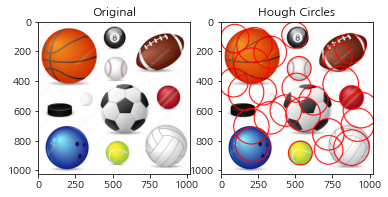

In [4]:
import cv2
import matplotlib.pyplot as plt
src = cv2.cvtColor(cv2.imread('image/6th_day/balls.jpg'), cv2.COLOR_BGR2RGB)
dst = src.copy()

image = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)

circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=15, minRadius=80, maxRadius=120)
for i in circles[0]:
    cv2.circle(dst, (i[0], i[1]), int(i[2]), (255,0,0),5)

plt.subplot(1,2,1)
plt.imshow(src)
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(dst)
plt.title('Hough Circles')

### 이번 차시 실습은 여기까지입니다! 고생하셨습니다 :)